# Notebook for testing purposes

In [2]:
import cv2
import numpy as np
import os

images = []
faces = []

path = r"C:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\ssd-mobilenet-v2\data\processed"
for image in os.listdir(path+"\\Images"):
    images.append(path + '\\Images\\' + image)
    faces.append(path + '\\labels\\' + image.split(".")[0] + ".txt")

print(images[0])
print(faces[0])

C:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\ssd-mobilenet-v2\data\processed\Images\0.jpg
C:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\ssd-mobilenet-v2\data\processed\labels\0.txt


In [3]:
bounding_boxes = []
for face in faces:
    with open(face) as f:
        bounding_boxes.append(f.readlines())
boxes = []
for box in bounding_boxes:
    boundingBox = box[0].split(" ")
    boundingBox = boundingBox[:-1]
    #group every 5 elements in a list
    boundingBox = [boundingBox[i:i+5] for i in range(0, len(boundingBox), 5)]
    boxes.append(boundingBox)

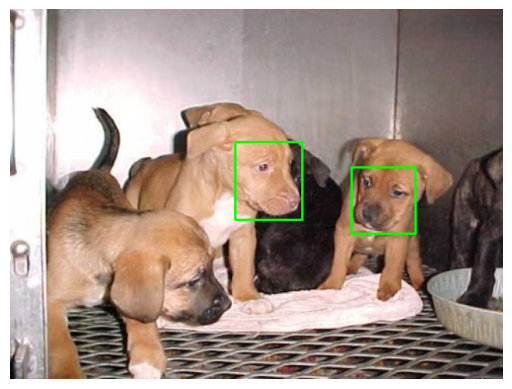

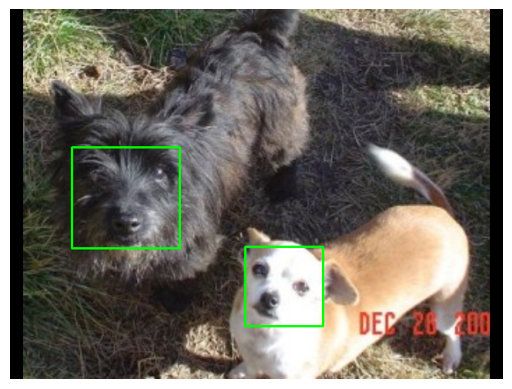

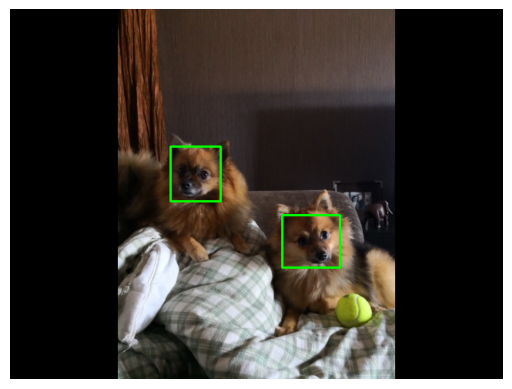

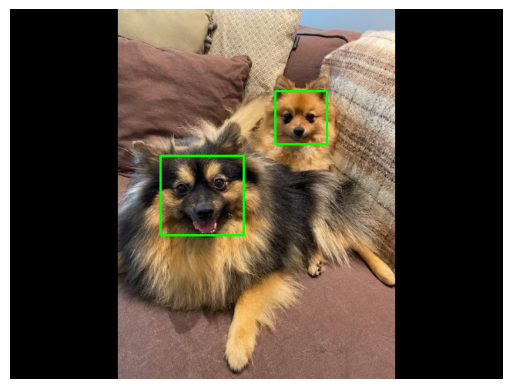

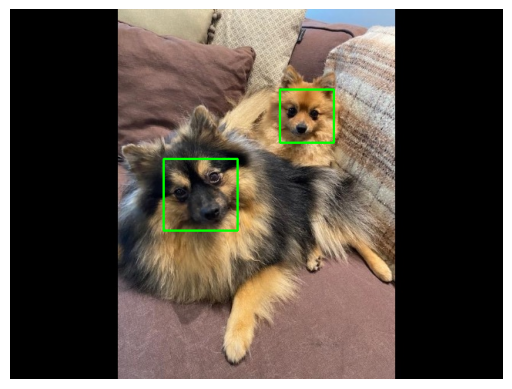

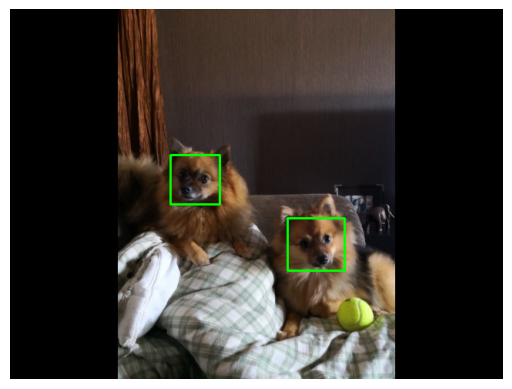

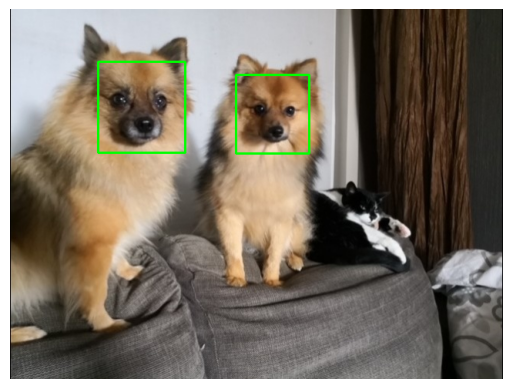

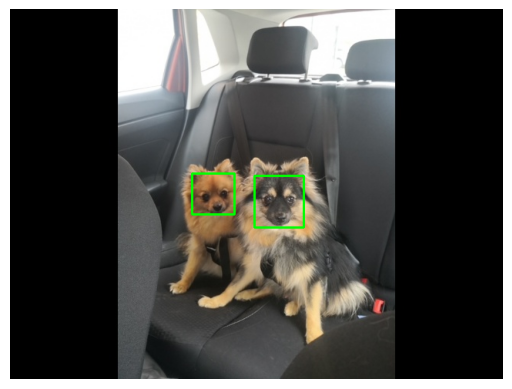

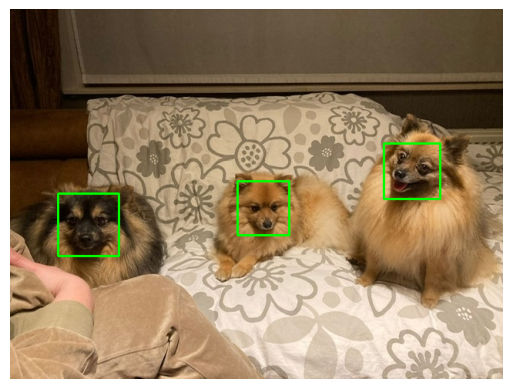

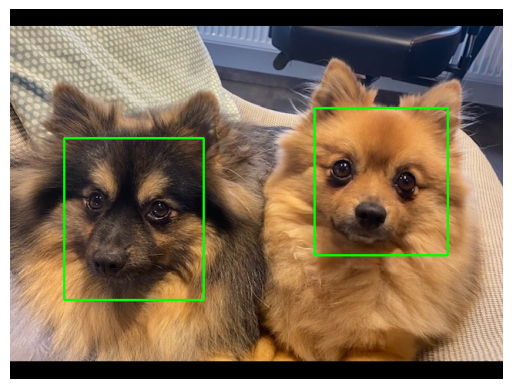

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
for i in range(len(images)):
    img = cv2.imread(images[i])
    for box in boxes[i]:
        x = int(float(box[1]))
        y = int(float(box[2]))
        w = int(float(box[3]))
        h = int(float(box[4]))
        img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    if len(boxes[i]) > 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

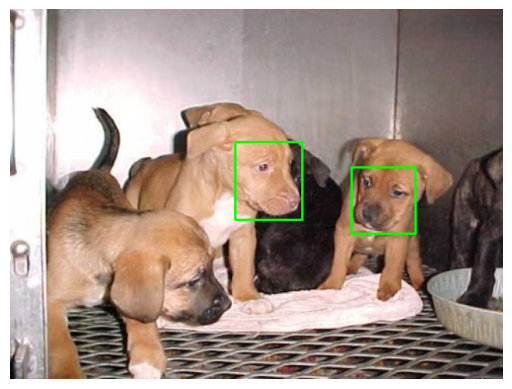

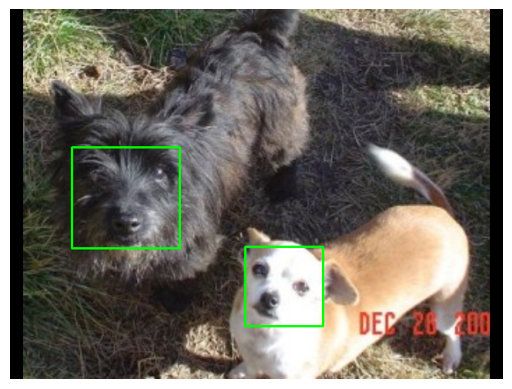

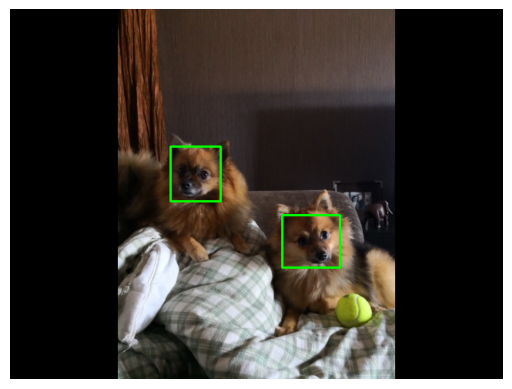

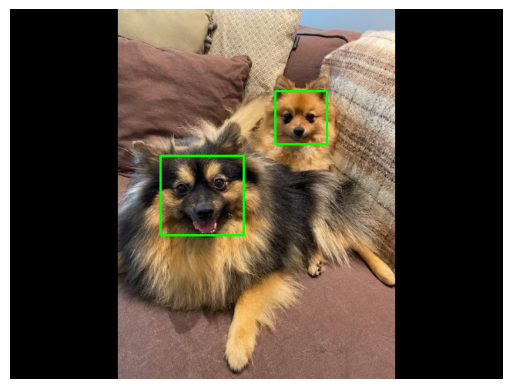

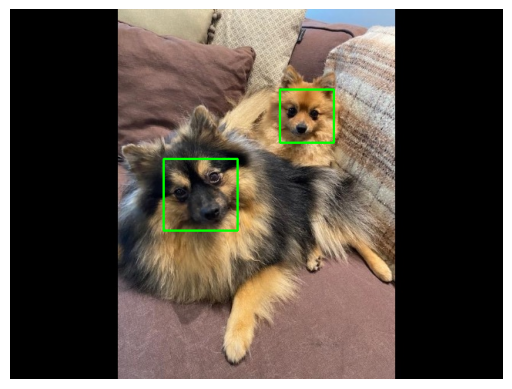

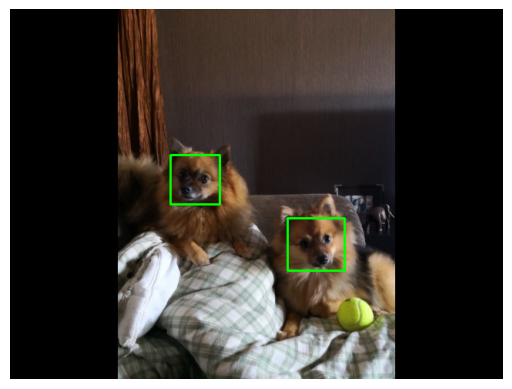

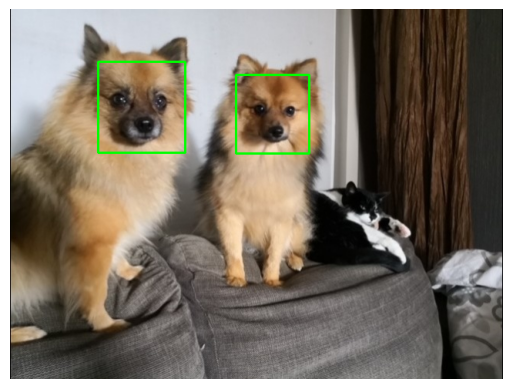

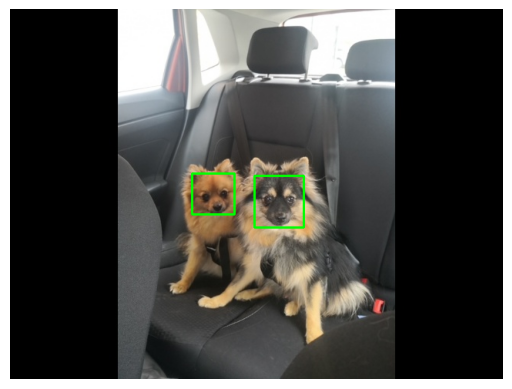

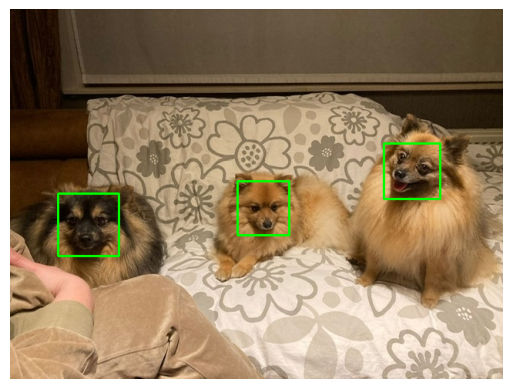

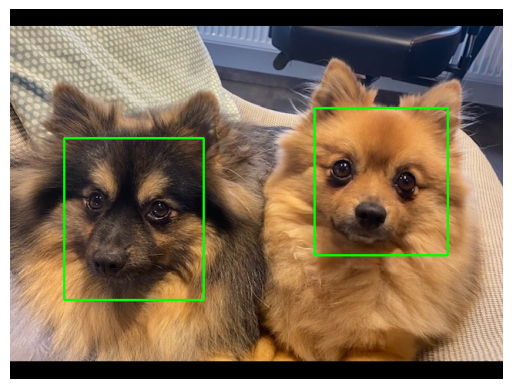

In [8]:
#converts xywh to xmin ymin xmax ymax
def xywh_to_xyxy(box):
    x = int(float(box[1]))
    y = int(float(box[2]))
    w = int(float(box[3]))
    h = int(float(box[4]))
    xmin = x 
    ymin = y 
    xmax = x + w
    ymax = y + h
    return xmin, ymin, xmax, ymax

test_coords = []
testimage = []
for i in range(len(images)):
    img = cv2.imread(images[i])
    for box in boxes[i]:
        xmin, ymin, xmax, ymax = xywh_to_xyxy(box)
        img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)
        test_coords.append([xmin, ymin, xmax, ymax])
    if len(boxes[i]) > 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        testimage.append(img)